In [2]:
% pylab inline
figsize(10, 8)

import sys
sys.path.append("/Users/humphreyshotton/ds/twicol")

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pickle

with open('ptweets500k_30min.pkl', 'rb') as file:
    docs = pickle.load(file)
    
with open('D:/ds/flooding/floods.pkl', 'rb') as file:
    floods = pickle.load(file)

In [4]:
from datetime import timedelta

tmin = min([d['times']['start'] for d in docs]) - timedelta(days=2) 
tmax = max([d['times']['finish'] for d in docs])
tmin, tmax

(datetime.datetime(2015, 12, 6, 16, 0, 0, 99000),
 datetime.datetime(2015, 12, 16, 20, 40, 8, 240000))

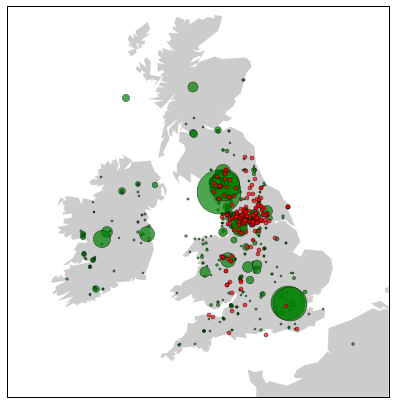

In [5]:
from mpl_toolkits.basemap import Basemap

fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
#mp = Basemap(projection='robin', lat_0=0, lon_0=0,
#              resolution='l', area_thresh=1000.0)
mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
    resolution='l', area_thresh = 1000.0,
    urcrnrlat=58.869587, urcrnrlon=4.186178,
    llcrnrlat=48.949979, llcrnrlon=-12.359231) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        ms = (len(x['tweets']) / 10) ** (1/2)
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)

for x in floods:
    if x['starttime'] < tmin or x['starttime'] > tmax:
        continue
    try:
        x2,y = mp(x['coordinates'][0], x['coordinates'][1])
    except KeyError:
        continue
        
    mp.plot(x2, y, 'o', markersize=4, color='red', alpha=0.7)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k_2.png', dpi=200, alpha=True)

In [6]:
from pymongo import MongoClient

# connect to mongodb
client = MongoClient("localhost", 27017)
db = client["twitter"]

docs[0]['tweets'][0]['id']

for d in docs:
    d['areas'] = []
    for t in d['tweets']:
        x = db.ptweets2.find_one({'tweetid': t['id']})
        d['areas'].append(x['area'])
print("Done.")

Done.


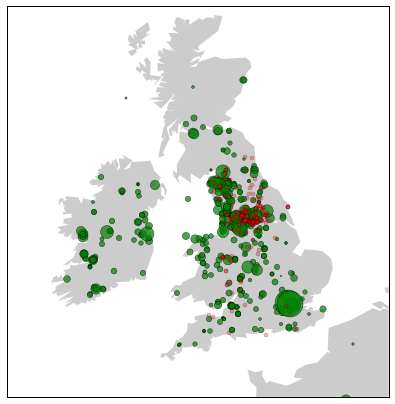

In [8]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
#mp = Basemap(projection='robin', lat_0=0, lon_0=0,
#              resolution='l', area_thresh=1000.0)
mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
    resolution='l', area_thresh = 1000.0,
    urcrnrlat=58.869587, urcrnrlon=4.186178,
    llcrnrlat=48.949979, llcrnrlon=-12.359231) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        
        #ms = (len(x['tweets']) / 10) ** (1/2)
        ms = (sum([1 / i for i in x['areas']])) ** (1/4)
        
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)
        
for x in floods:
    if x['starttime'] < tmin or x['starttime'] > tmax:
        continue
    try:
        x2,y = mp(x['coordinates'][0], x['coordinates'][1])
    except KeyError:
        continue
        
    mp.plot(x2, y, 'o', markersize=4, color='red', alpha=0.3)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k-area.png', dpi=200, alpha=True)

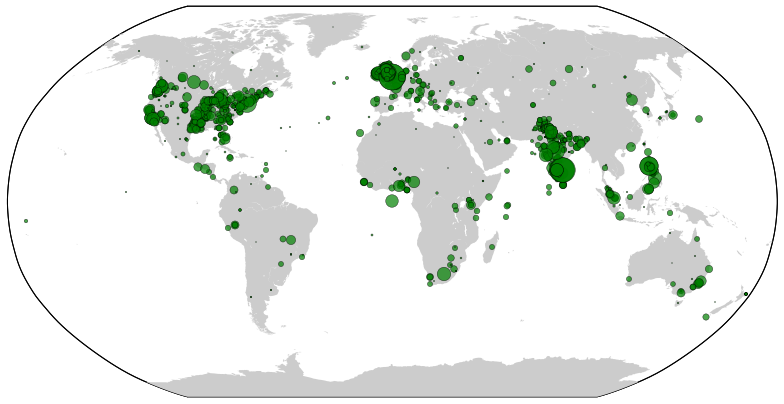

In [10]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
mp = Basemap(projection='robin', lat_0=0, lon_0=0,
              resolution='l', area_thresh=1000.0)
#mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
#    resolution='l', area_thresh = 1000.0,
#    urcrnrlat=58.869587, urcrnrlon=4.186178,
#    llcrnrlat=48.949979, llcrnrlon=-12.359231) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        
        #ms = (len(x['tweets']) / 10) ** (1/2)
        ms = (sum([1 / i for i in x['areas']])) ** (1/4)
        
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k-area_2.png', dpi=200, alpha=True)

In [15]:
import csv

floodlocs = []
with open('usstorms2015.csv') as file:
    csvreader = csv.reader(file)
    
    for x in csvreader:
        if x[0] == '201512':
            floodlocs.append((float(x[7]), float(x[8])))

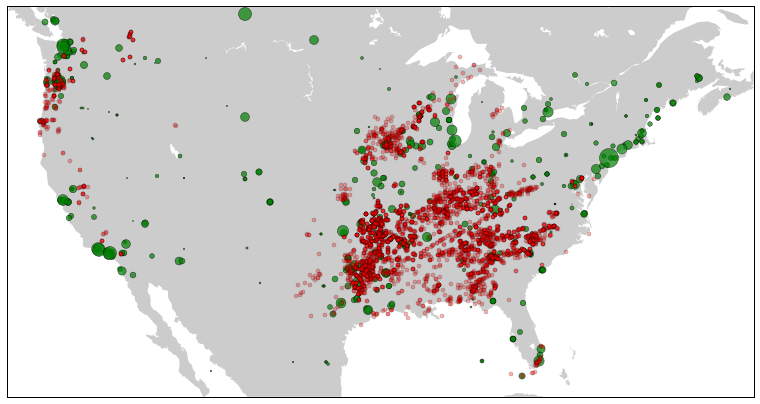

In [20]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
    resolution='l', area_thresh = 1000.0,
    urcrnrlat=50.124303, urcrnrlon=-61.248737,
    llcrnrlat=22.882793, llcrnrlon=-127.342485) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        
        #ms = (len(x['tweets']) / 10) ** (1/2)
        ms = (sum([1 / i for i in x['areas']])) ** (1/4)
        
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)
        
for d in floodlocs:
    x, y = mp(d[1], d[0])
        
    mp.plot(x, y, 'o', markersize=4, color='red', alpha=0.3)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k-area_24.png', dpi=200, alpha=True)

In [40]:
min_i_ym = int(str(tmin.year) + str(tmin.month))
max_i_ym = int(str(tmax.year) + str(tmax.month))

us_floodl = []
with open('usstorms2015-deets.csv') as file:
    csvreader = csv.reader(file)
    next(csvreader, None)
    
    for x in csvreader:
        if int(x[0]) < min_i_ym and int(x[3]) < max_i_ym:
            continue
            
        if (int(x[1]) < tmin.day and int(x[4]) < tmin.day) or (int(x[1]) > tmax.day):
            continue
            
        if "flood" not in x[12].lower():
            continue
        
        try:
            us_floodl.append((float(x[44]), float(x[45])))
        except ValueError:
            pass
        
len(us_floodl)

171

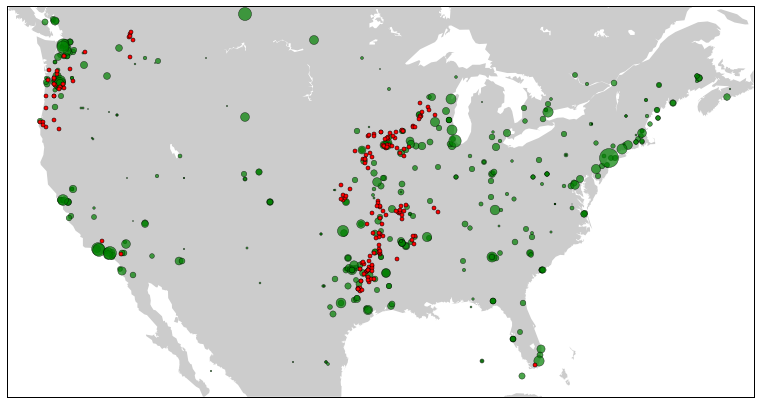

In [42]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
    resolution='l', area_thresh = 1000.0,
    urcrnrlat=50.124303, urcrnrlon=-61.248737,
    llcrnrlat=22.882793, llcrnrlon=-127.342485) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        
        #ms = (len(x['tweets']) / 10) ** (1/2)
        ms = (sum([1 / i for i in x['areas']])) ** (1/4)
        
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)
        
for d in us_floodl:
    x, y = mp(d[1], d[0])
        
    mp.plot(x, y, 'o', markersize=4, color='red', alpha=1)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k-area_24.png', dpi=200, alpha=True)